In [5]:
#Chargement de la librairie
import pandas as pd

In [6]:
#Chargement de notre jeu de données
df = pd.read_csv("Data_EDF_.csv")

In [7]:
#Chargement de la dataframe du jeu de données
df

,row ID,Puissance,Year,Month,Day,Hour,Minute,Second
0,Row0,168160,2014,1,1,0,0,0
1,Row1,168132,2014,1,1,0,10,0
2,Row2,168290,2014,1,1,0,20,0
3,Row3,167962,2014,1,1,0,30,0
4,Row4,167864,2014,1,1,0,40,0
...,...,...,...,...,...,...,...,...
305413,Row305413,246475,2019,10,23,23,10,0
305414,Row305414,250097,2019,10,23,23,20,0
305415,Row305415,247039,2019,10,23,23,30,0
305416,Row305416,247972,2019,10,23,23,40,0


In [8]:
df['Time'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis = 1)
# Rename column to Temp
df.rename(columns = {'Puissance' : 'Snow'}, inplace = True)

In [9]:
df = df.groupby([df['Time'].dt.date]).mean()
df.index = pd.to_datetime(df.index)

In [10]:
df.loc[df.Snow == 0, 'mask'] = "Not snowing"
df.loc[df.Snow != 0, 'mask'] = "Snowing"

In [11]:
#Chargement de la librairie
import pandas as pd

In [12]:
#Chargement de notre jeu de données
df = pd.read_csv("Data_EDF_.csv")

In [13]:
df['Time'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis = 1)
# Rename column to Temp
df.rename(columns = {'Puissance' : 'Temp'}, inplace = True)

In [14]:
df = df.groupby([df['Time'].dt.date]).mean()
df.index = pd.to_datetime(df.index)

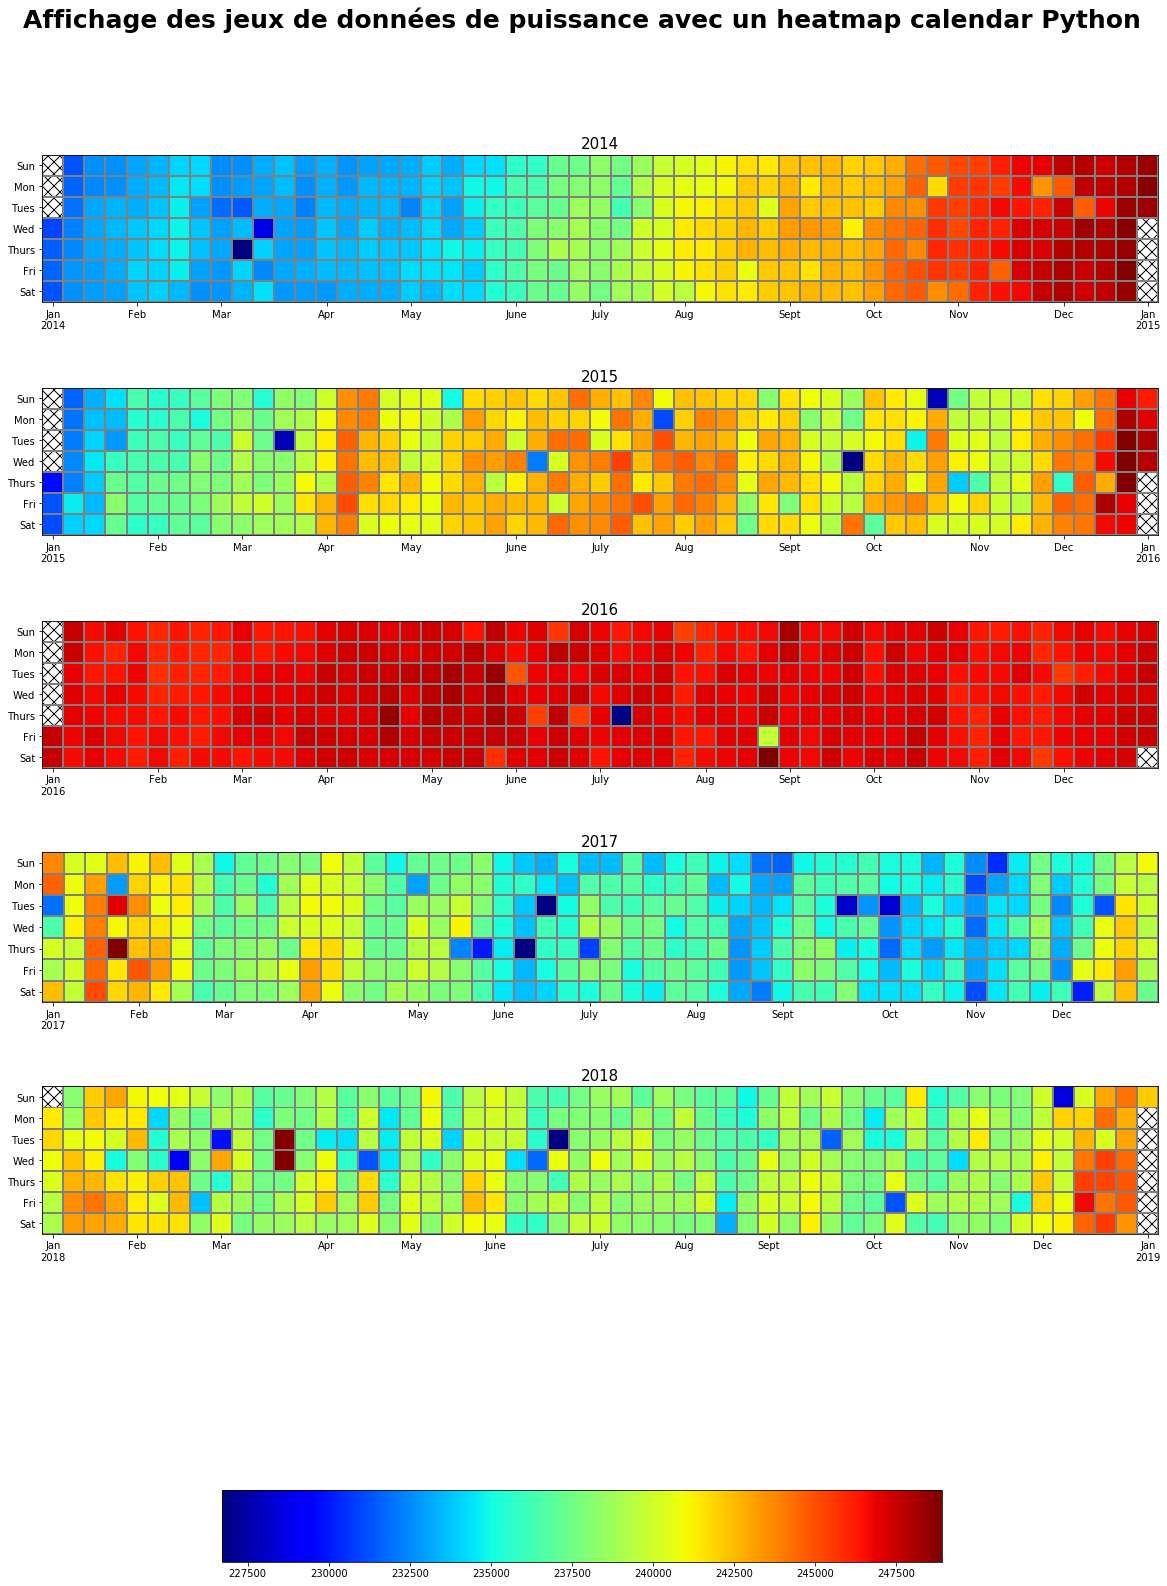

In [17]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

# Turn data frame to a dictionary for easy access
cal = {'2014': df[df.index.year == 2014],'2015': df[df.index.year == 2015],'2016': df[df.index.year == 2016], '2017': df[df.index.year == 2017],'2018': df[df.index.year == 2018]}

# Define Ticks
DAYS = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(5, 1, figsize = (20,20))
for i, val in enumerate(['2014','2015','2016','2017','2018']):
    start = cal.get(val).index.min()
    end = cal.get(val).index.max()
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun =  end + np.timedelta64(7 - end.dayofweek -1, 'D')

    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.full([7, num_weeks], np.nan)    
    ticks = {}
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                heatmap[day, week] = cal.get(val).loc[date, 'Temp']
    mesh = ax[i].pcolormesh(x, y, heatmap, cmap = 'jet', edgecolors = 'grey')

    ax[i].invert_yaxis()

    # Set the ticks.
    ax[i].set_xticks(list(ticks.keys()))
    ax[i].set_xticklabels(list(ticks.values()))
    ax[i].set_yticks(np.arange(7))
    ax[i].set_yticklabels(DAYS)
    ax[i].set_ylim(6.5,-0.5)
    ax[i].set_aspect('equal')
    ax[i].set_title(val, fontsize = 15)

    # Hatch for out of bound values in a year
    ax[i].patch.set(hatch='xx', edgecolor='black')

# Add color bar at the bottom
cbar_ax = fig.add_axes([0.25, -0.10, 0.5, 0.05])
fig.colorbar(mesh, orientation="horizontal", pad=0.2, cax = cbar_ax)
colorbar = ax[1].collections[0].colorbar
#r = colorbar.vmax - colorbar.vmin
fig.suptitle('Affichage des jeux de données de puissance avec un heatmap calendar Python', fontweight = 'bold', fontsize = 25)
fig.subplots_adjust(hspace = 0.5)